$$ \delta = \lim_{n \rightarrow \infty}\frac{\gamma_n - \gamma_{n-1}}{\gamma_{n+1} - \gamma_n}$$ 

$$ \delta \approx \frac{V_8 - V_4}{V_{16} - V_8}$$ 

$$ V_{Drive} = 0.3$$

$$ L \frac{dI}{dt} = -RI(t) - \bigg(\frac{C_2 - C_1}{2C_1 C_2}|q(t)|+ \frac{C_1 + C_2}{2C_1 C_2}q(t) + E_0 \bigg) + V_0 sin(2\pi f t)$$ 

In [385]:
feigenbaums = [3.210, 6.294, 5.789, 5.380, 5.409, 4.920, 4.920, 4.281, 4.200]
f_errors = [1.418, 2.848, 2.362, 2.001, 1.919, 1.552, 1.552, 1.073, 0.965] 
sigma = 0.16

In [374]:
print("average feigenbaum value:", sum(feigenbaums) / len(feigenbaums))
print("average error value:", sum(f_errors) / len(f_errors))

average feigenbaum value: 4.933666666666666
average error value: 1.7433333333333332


$$ \delta_{average} \approx 4.933 \pm 1.743$$ 

$$ T \sim (\gamma - \gamma_{chaos})^{\tau}$$ 

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib
%precision %g
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['savefig.dpi'] = 240
matplotlib.rcParams['figure.dpi'] = 240
%matplotlib inline

In [91]:
#exp_bandwidth_120 = [537.9, 543.1, 545.3, 553.3, 552.9] # 120 kHz
exp_bandwidth_120 = [537.9, 543.1, 545.3, 553.3] # 120 kHz
exp_bandwidth_error_120 = [19.4, 15.7, 21.9, 25.4]
#exp_bandwidth_140 = [435.1, 437.8, 440.7, 448.0, 437.6] # 140 kHz
exp_bandwidth_140 = [435.1, 437.8, 440.7, 448.0] # 140 kHz
exp_bandwidth_error_140 = [14.0, 11.9, 8.9, 6.0]
chaos_120 = 7.94 # voltage chaos appears 
chaos_140 = 8.27
#driving_voltage_120 = [8.04, 8.14, 8.24, 8.34, 8.44] # driving voltages at 120 kHz
driving_voltage_120 = [8.04, 8.14, 8.24, 8.34] # driving voltages at 120 kHz
#driving_voltage_140 = [8.37, 8.47, 8.57, 8.67, 8.77] # driving voltages at 140 kHz
driving_voltage_140 = [8.37, 8.47, 8.57, 8.67] # driving voltages at 140 kHz

In [85]:
calc_bandwidth_120 = np.subtract(driving_voltage_120, chaos_120)
calc_bandwidth_140 = np.subtract(driving_voltage_140, chaos_140)
print(calc_bandwidth_120)
print(calc_bandwidth_140)

[0.1 0.2 0.3 0.4]
[0.1 0.2 0.3 0.4]


In [92]:
def f(x, a, b):
    return a * (x)** b

In [113]:
fit_120 = curve_fit(f, calc_bandwidth_120, exp_bandwidth_120, sigma = exp_bandwidth_error_120)
print(fit_120)
popt, pcov  = curve_fit(f, calc_bandwidth_120, exp_bandwidth_120, sigma = exp_bandwidth_error_120)
print("popt", popt)
print("pcov", pcov)
perr = np.sqrt(np.diag(pcov))
print("perr", perr)

(array([5.59121822e+02, 1.74409660e-02]), array([[1.69922315e+01, 1.75002314e-02],
       [1.75002314e-02, 1.96365090e-05]]))
popt [5.59121822e+02 1.74409660e-02]
pcov [[1.69922315e+01 1.75002314e-02]
 [1.75002314e-02 1.96365090e-05]]
perr [4.12216345 0.00443131]


(510, 590)

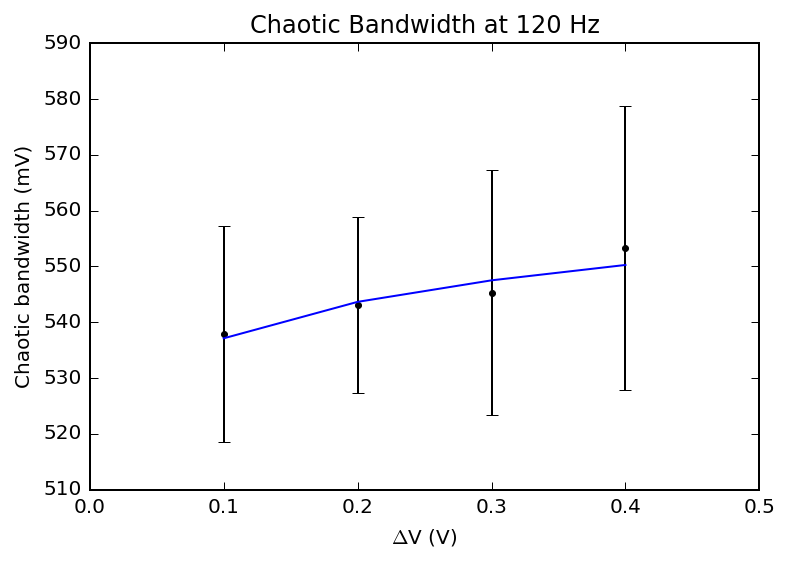

In [106]:
#plt.scatter(calc_bandwidth_120, exp_bandwidth_120)
plt.errorbar(calc_bandwidth_120, exp_bandwidth_120, yerr=exp_bandwidth_error_120, fmt = '.', color = 'black')
plt.plot(calc_bandwidth_120, f(calc_bandwidth_120, fit_120[0][0], fit_120[0][1]))
plt.title("Chaotic Bandwidth at 120 Hz")
plt.xlabel("$\Delta$V" " (V)")
plt.ylabel("Chaotic bandwidth (mV)")
plt.xlim(0, 0.5)
plt.ylim(510, 590)

In [114]:
fit_140 = curve_fit(f, calc_bandwidth_140, exp_bandwidth_140, sigma = exp_bandwidth_error_140)
print(fit_140)
print(fit_140[0])
popt, pcov  = curve_fit(f, calc_bandwidth_140, exp_bandwidth_140, sigma = exp_bandwidth_error_140)
print("popt", popt)
print("pcov", pcov)
perr = np.sqrt(np.diag(pcov))
print("perr", perr)

(array([4.56481229e+02, 2.35934155e-02]), array([[2.01177337e+01, 3.26039374e-02],
       [3.26039374e-02, 5.92953392e-05]]))
[4.56481229e+02 2.35934155e-02]
popt [4.56481229e+02 2.35934155e-02]
pcov [[2.01177337e+01 3.26039374e-02]
 [3.26039374e-02 5.92953392e-05]]
perr [4.48527966 0.00770035]


(0, 0.5)

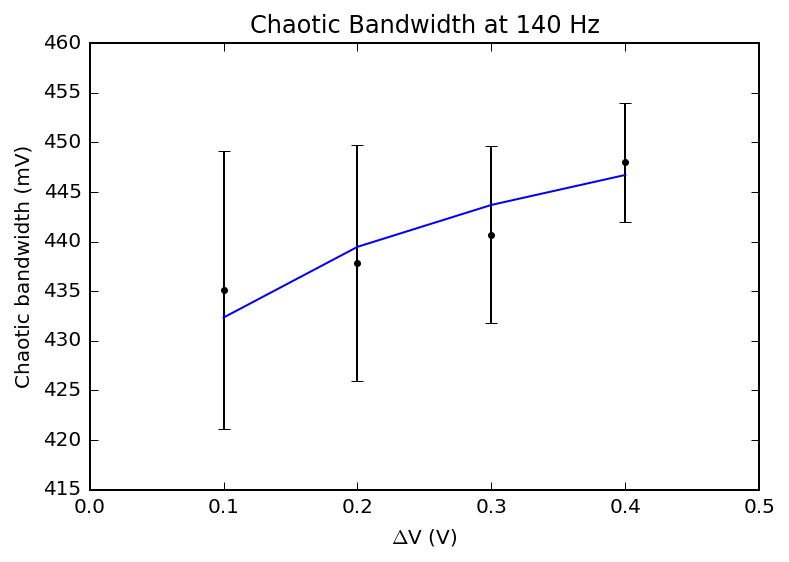

In [117]:
#plt.scatter(calc_bandwidth_140, exp_bandwidth_140)
plt.errorbar(calc_bandwidth_140, exp_bandwidth_140, yerr=exp_bandwidth_error_140, fmt = '.', color = 'black')
plt.plot(calc_bandwidth_140, f(calc_bandwidth_140, fit_140[0][0], fit_140[0][1]))
plt.title("Chaotic Bandwidth at 140 Hz")
plt.xlabel("$\Delta$V" " (V)")
plt.ylabel("Chaotic bandwidth (mV)")
plt.ylim(415, 460)
plt.xlim(0, 0.5)

$\tau = .01842$ at 120kHz 

In [4]:
def calculate_d(vn, vnm1, vnp1):
    '''
    calculates the feigenbaum ratio 
    '''
    return (vn - vnm1) / (vnp1 - vn)

In [117]:
def error_d(vn, vnm1, vnp1, dvn, dvnm1, dvnp1):
    '''
    returns the error found in feigenbaum ratio 
    '''
    first_term = ((1 / (vn - vnp1))*dvnm1)**2
    second_term = (((1 / (vnp1-vn)) + ((vn-vnm1) / (vnp1-vn)**2))*dvn)**2
    third_term = (((vn - vnm1) / (vnp1 - vn)**2)*dvnp1)**2
    error = np.sqrt(first_term + second_term + third_term)
    return error

In [9]:
def new_error_d(vn, vnm1, vnp1, dv, test):
    '''
    
    '''

    
    first_term = (((vn - vnm1) + (vnp1 - vn)) / (vnp1 - vn)**2)*dv
    second_term = -dv
    third_term = (-(vn - vnm1) / (vnp1 - vn)**2)*dv
    error = np.sqrt(first_term**2 + second_term**2 + third_term**2)
    if test == True:
        print("First term: ", first_term)
        print("Second term: ", second_term)
        print("Third term: ", third_term)
        print("First term squared: ", first_term**2)
        print("Second term squared: ", second_term**2)
        print("Third term squared: ", third_term**2)
        
    return error


In [3]:
def sigma(experiment, accepted):
    '''
    returns the number of sigmas our answer is from the answer 
    '''
    
    sigma = abs(experiment - accepted)
    return sigma 

In [63]:
# 110 
# 170 
vn = 6.29
vnm1 = 4.82
vnp1 = 6.64
dv = 0.05
test = True

In [64]:
point1 = calculate_d(vn, vnm1, vnp1)
error_point_1 = new_error_d(vn, vnm1, vnp1, dv, test )
print("Feigenbaum ratio:", point1)
print("Error:", error_point_1)

First term:  0.7428571428571442
Second term:  -0.05
Third term:  -0.6000000000000012
First term squared:  0.5518367346938796
Second term squared:  0.0025000000000000005
Third term squared:  0.36000000000000143
Feigenbaum ratio: 4.200000000000004
Error: 0.956209566305358


In [82]:
exp = point1
exp = 4.903
accepted = 4.669201
error = error_point_1
error = 1.706
exp_diff = abs(exp - accepted)
sigma = .14
print("We are within", sigma, "sigma of the mean:", exp_diff < (sigma)*error)

We are within 0.14 sigma of the mean: True


In [74]:
fbaum = [3.211, 6.294, 5.789, 5.380, 5.409, 4.920, 4.643, 4.281, 4.200]
error_fbaum = [1.394, 2.834, 2.362, 1.988, 1.907, 1.540, 1.306, 1.063, 0.956]
fbaum_avg = sum(fbaum) / len(fbaum)
error_fbaum_avg = sum(error_fbaum) / len(error_fbaum)
print("Average Feigenbaum value: ", fbaum_avg)
print("Average Feigenbaum error", error_fbaum_avg)









Average Feigenbaum value:  4.9030000000000005
Average Feigenbaum error 1.7055555555555555


In [185]:
# V2 data
x_V2 = [13.90, 9.61, 7.60, 5.99, 5.21, 4.66, 4.22, 3.27, 3.06, 2.87, 2.71, 2.56, 2.46, 2.37, 2.26, 2.17, 2.10, 2.02, 2.00, 1.95, 1.92, 1.87, 1.86, 1.84, 1.84, 1.84, 1.84, 1.86]
y_V2 = [30,35, 40, 45, 50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]

# V4 data
x_V4 = [18.14, 14.68,12.71, 11.25, 8.63, 8.13, 7.67, 7.30, 6.94, 6.71, 6.45, 6.22, 5.59, 5.41, 5.27, 5.14, 5.05, 4.94, 4.85, 4.82, 4.77, 4.82, 4.89, 5.00, 5.18]
y_V4 = [45, 50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]

# V8 data 
x_V8 = [15.80, 13.70, 12.10, 9.31, 8.74, 8.26, 7.86, 7.51, 7.29, 7.04, 6.83, 6.66, 6.51, 6.40, 6.33, 6.28, 6.24, 6.22, 6.29, 6.22, 6.56, 6.72, 7.15, 7.64]
y_V8 = [50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170,175]

# V16 data
x_V16 = [16.29, 9.41, 8.84, 8.38, 7.97, 7.64, 7.39, 7.19, 7.02, 6.83, 6.70, 6.61, 6.55, 6.53, 6.52, 6.54, 6.64, 6.79, 7.03, 7.34, 7.79, 8.43]
y_V16 = [50,75,80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145 ,150, 155, 160, 165, 170,175]

# V16' data
x_V16prime = [16.30, 9.45, 8.89, 8.42, 8.02, 7.68, 7.49, 7.24, 7.05, 6.88, 6.77, 6.68, 6.63, 6.60, 6.63, 6.64, 6.73, 6.92, 7.14, 7.45, 7.93, 8.62]
y_V16prime = [50, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135,140,145, 150, 155, 160, 165, 170, 175]

# V8prime data 
x_V8prime = [16.02, 13.81, 12.26,9.48, 8.93, 8.46, 8.06, 7.72, 7.58, 7.28, 7.09, 6.93, 6.81, 6.73, 6.69, 6.68, 6.69, 6.71, 6.82, 7.02, 7.25, 7.61, 8.12, 8.84]      
y_V8prime =[50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120 ,125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]  

# V12 data 
x_V12 = [16.10, 13.91, 12.35, 9.55, 9.00, 8.53, 8.13, 7.80, 7.60, 7.37, 7.18, 7.04, 6.92, 6.84, 6.80, 6.80, 6.83, 6.86, 7.01, 7.21]
y_V12 = [50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155]


# V12prime data 
x_V12prime = [16.18, 13.93, 12.37, 9.59, 9.02, 8.55, 8.16, 7.82, 7.63, 7.41, 7.22, 7.07, 6.94, 6.87, 6.83, 6.83, 6.87, 6.91, 7.03, 7.21]
y_V12prime = [50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155]

# V4' data 
x_V4prime = [16.67, 14.34, 12.70, 9.82, 9.25, 8.78, 8.39, 8.05, 7.87, 7.65, 7.46, 7.31, 7.20 ,7.13, 7.09, 7.11, 7.15, 7.20, 7.33, 7.56 ,7.84, 8.27, 8.85, 9.70]
y_V4prime = [50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]

# V6 data 
x_V6 = [7.81, 7.69, 7.60, 7.56, 7.55, 7.60, 7.67, 7.77, 7.98, 8.27, 8.67, 9.22, 9.99, 11.18]
y_V6 = [110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]

# V6' data 
x_V6prime = [7.82, 7.70, 7.62, 7.58, 7.58, 7.63, 7.72, 7.83, 8.04, 8.33, 8.77, 9.38 ,10.23, 11.53] 
y_V6prime = [110 ,115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]

# Vchaos data 
x_Vchaos = [17.30, 14.87, 13.25, 10.26,9.69, 9.24 ,8.86, 8.55 ,8.40, 8.23 ,8.09, 7.99 ,7.94 ,7.98, 8.00, 8.11, 8.27, 8.48, 8.81, 9.23, 9.91, 10.79, 12.12, 14.36]
y_Vchaos = [50, 55, 60, 75, 80 ,85, 90 ,95, 100, 105, 110, 115, 120 ,125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]


# V5 data 
x_V5 = [17.79, 15.27, 13.58, 10.58, 10.02, 9.58, 9.23 ,8.95 ,8.84, 8.69, 8.60, 8.56, 8.58, 8.65, 8.80 ,9.01, 9.29, 9.63, 10.18, 10.93, 12.00, 13.59, 16.08]
y_V5 = [50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170]

# V5prime data 

x_V5prime = [17.82, 15.30, 13.60, 10.62, 10.06, 9.62, 9.27, 8.98, 8.89, 8.75, 8.67, 8.62, 8.66, 8.75, 8.89, 9.11, 9.42, 9.79, 10.34, 11.16 ,12.28, 13.99, 16.68]
y_V5prime=[50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120 ,125, 130, 135, 140, 145, 150, 155, 160, 165, 170]


# V3 data 
x_V3 = [18.29, 16.13,12.57, 11.90, 11.39, 11.02, 10.72, 10.65, 10.54, 10.49, 10.54, 10.63, 10.84, 11.12, 11.53, 12.07, 12.70, 13.73, 15.07]
y_V3 = [55, 60, 75, 80, 85 ,90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155]

# V6star data 
x_V6star = [15.75, 14.86, 14.00, 13.28, 12.69, 12.33, 11.95, 11.66, 11.43, 11.31, 11.30, 11.36, 11.54, 12.07, 12.70, 13.73, 15.07]
y_V6star = [75, 80, 85, 90, 95, 100, 105 ,110 ,115, 120 ,125 ,130, 135, 140, 145, 150, 155]


# V12star data 
x_V12star = [16.66, 15.69, 14.81, 14.14, 13.60, 13.32, 12.98, 12.74, 12.58, 12.50, 12.52, 12.63, 12.85, 13.05, 13.42, 13.92, 15.07] 
y_V12star =[75, 80, 85, 90, 95, 100, 105, 110, 115, 120 ,125, 130, 135, 140, 145, 150, 155]

# V12starprime data 
x_V12starprime = [17.12, 16.01, 15.15, 14.48, 13.95, 13.65, 13.34, 13.11, 12.97, 12.93, 12.95, 13.09, 13.30, 13.47, 13.92 ,14.50, 15.24]
y_V12starprime = [75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155]

# V6starprime data 
x_V6starprime = [17.73,16.60, 15.69, 14.98 ,14.42, 14.13, 13.81, 13.56, 13.41, 13.35, 13.37, 13.48, 13.69, 13.87, 14.34, 14.87, 15.65, 17.11]
y_V6starprime = [75, 80, 85, 90, 95 ,100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160]

# Vchaosstar data 
x_Vchaosstar = [18.52,17.31 ,16.44, 15.70, 15.15, 14.88, 14.57, 14.38, 14.24, 14.24, 14.31, 14.48, 14.77, 15.02, 15.60, 16.32, 17.30, 18.54]
y_Vchaosstar = [75,80, 85 ,90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150 ,155, 160]



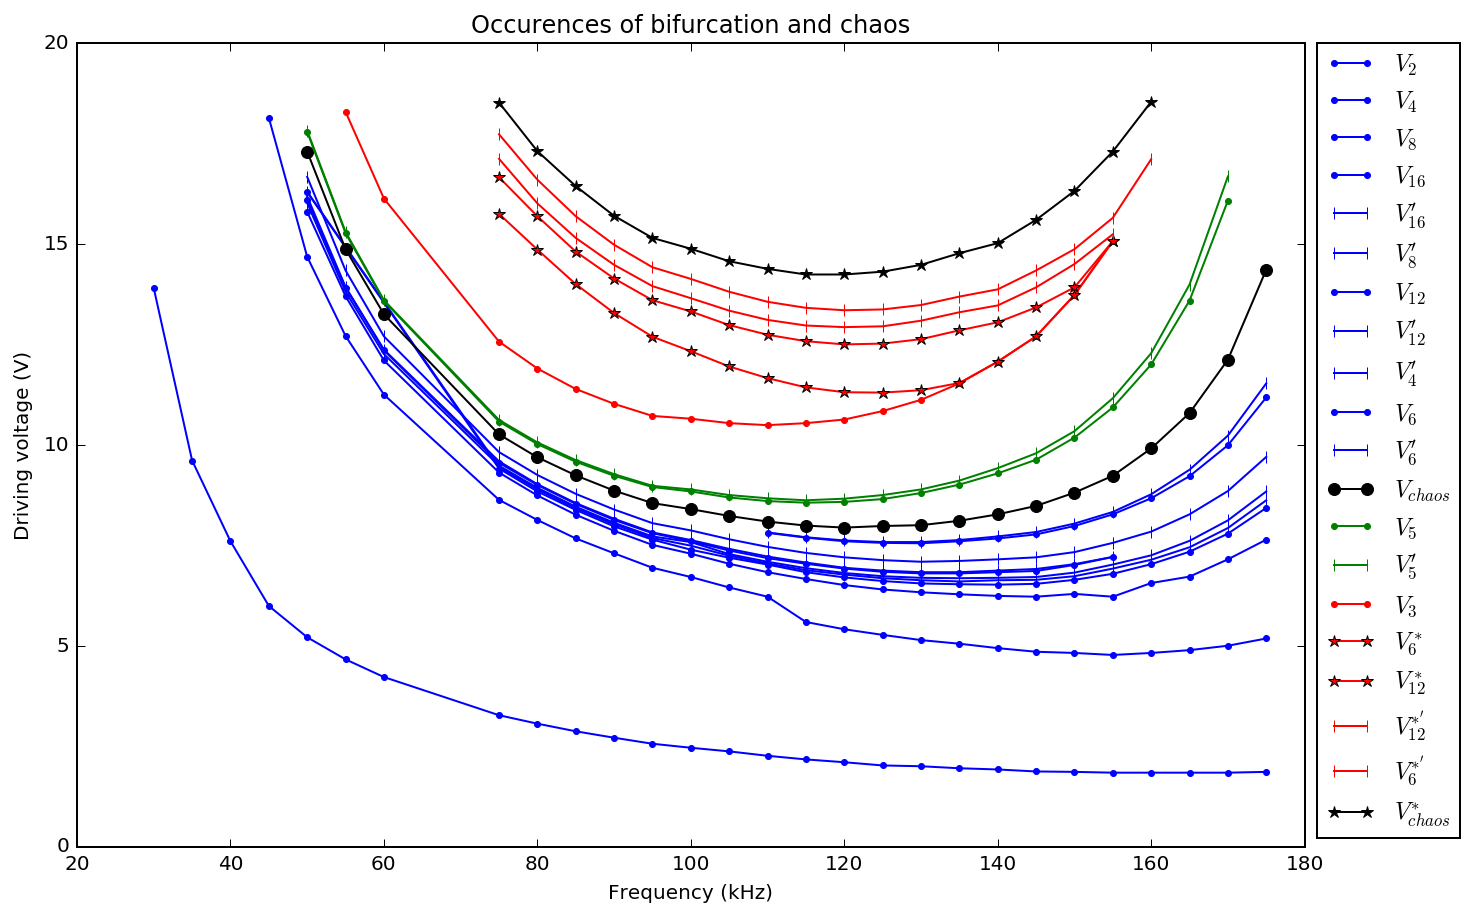

In [202]:
x = plt.plot(y_V2, x_V2, linestyle='-', marker='.', color='b', label = "$V_{2}$")
x = plt.plot(y_V4, x_V4, linestyle='-', marker='.', color='b', label = "$V_{4}$")
x = plt.plot(y_V8, x_V8, linestyle='-', marker='.', color='b', label = "$V_{8}$")
x = plt.plot(y_V16, x_V16, linestyle='-', marker='.', color='b', label = "$V_{16}$")
x = plt.plot(y_V16prime, x_V16prime, linestyle='-', marker='|', color='b', label = "$V_{16}'$")
x = plt.plot(y_V8prime, x_V8prime, linestyle='-', marker='|', color='b', label = "$V_{8}'$")
x = plt.plot(y_V12, x_V12, linestyle='-', marker='.', color='b', label = "$V_{12}$")
x = plt.plot(y_V12prime, x_V12prime, linestyle='-', marker='|', color='b', label = "$V_{12}'$")
x = plt.plot(y_V4prime, x_V4prime, linestyle='-', marker='|', color='b', label = "$V_{4}'$")
x = plt.plot(y_V6, x_V6, linestyle='-', marker='.', color='b', label = "$V_{6}$")
x = plt.plot(y_V6prime, x_V6prime, linestyle='-', marker='|', color='b', label = "$V_{6}'$")
x = plt.plot(y_Vchaos, x_Vchaos, linestyle='-', marker='o', color='k', label = "$V_{chaos}$")
x = plt.plot(y_V5, x_V5, linestyle='-', marker='.', color='g', label = "$V_{5}$")
x = plt.plot(y_V5prime, x_V5prime, linestyle='-', marker='|', color='g', label = "$V_{5}'$")
x = plt.plot(y_V3, x_V3, linestyle='-', marker='.', color='r', label = "$V_{3}$")
x = plt.plot(y_V6star, x_V6star, linestyle='-', marker='*', color='r', label = "$V_{6}^*$")
x = plt.plot(y_V12star, x_V12star, linestyle='-', marker='*', color='r', label = "$V_{12}^*$")
x = plt.plot(y_V12starprime, x_V12starprime, linestyle='-', marker='|', color='r', label = "$V_{12}^{*'}$")
x = plt.plot(y_V6starprime, x_V6starprime, linestyle='-', marker='|', color='r', label = "$V_{6}^{*'}$")
x = plt.plot(y_Vchaosstar, x_Vchaosstar, linestyle='-', marker='*', color='k', label = "$V_{chaos}^{*}$")
plt.title("Occurences of bifurcation and chaos")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Driving voltage (V)")
#plt.legend(loc = "upper right")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize'] = [11, 7.2]

In [492]:
# V2 data
x_V2 = [13.90, 9.61, 7.60, 5.99, 5.21, 4.66, 4.22, 3.27, 3.06, 2.87, 2.71, 2.56, 2.46, 2.37, 2.26, 2.17, 2.10, 2.02, 2.00, 1.95, 1.92, 1.87, 1.86, 1.84, 1.84, 1.84, 1.84, 1.86]
y_V2 = [30,35, 40, 45, 50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]

# V4 data
x_V4 = [18.14, 14.68,12.71, 11.25, 8.63, 8.13, 7.67, 7.30, 6.94, 6.71, 6.45, 6.22, 5.59, 5.41, 5.27, 5.14, 5.05, 4.94, 4.85, 4.82, 4.77, 4.82, 4.89, 5.00, 5.18]
y_V4 = [45, 50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]

# V8 data 
x_V8 = [15.80, 13.70, 12.10, 9.31, 8.74, 8.26, 7.86, 7.51, 7.29, 7.04, 6.83, 6.66, 6.51, 6.40, 6.33, 6.28, 6.24, 6.22, 6.29, 6.22, 6.56, 6.72, 7.15, 7.64]
y_V8 = [50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170,175]

# V16 data
x_V16 = [16.29, 9.41, 8.84, 8.38, 7.97, 7.64, 7.39, 7.19, 7.02, 6.83, 6.70, 6.61, 6.55, 6.53, 6.52, 6.54, 6.64, 6.79, 7.03, 7.34, 7.79, 8.43]
y_V16 = [50,75,80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145 ,150, 155, 160, 165, 170,175]

# V16' data
x_V16prime = [16.30, 9.45, 8.89, 8.42, 8.02, 7.68, 7.49, 7.24, 7.05, 6.88, 6.77, 6.68, 6.63, 6.60, 6.63, 6.64, 6.73, 6.92, 7.14, 7.45, 7.93, 8.62]
y_V16prime = [50, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135,140,145, 150, 155, 160, 165, 170, 175]

# V8prime data 
x_V8prime = [16.02, 13.81, 12.26,9.48, 8.93, 8.46, 8.06, 7.72, 7.58, 7.28, 7.09, 6.93, 6.81, 6.73, 6.69, 6.68, 6.69, 6.71, 6.82, 7.02, 7.25, 7.61, 8.12, 8.84]      
y_V8prime =[50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120 ,125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]  

# V12 data 
x_V12 = [16.10, 13.91, 12.35, 9.55, 9.00, 8.53, 8.13, 7.80, 7.60, 7.37, 7.18, 7.04, 6.92, 6.84, 6.80, 6.80, 6.83, 6.86, 7.01, 7.21]
y_V12 = [50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155]


# V12prime data 
x_V12prime = [16.18, 13.93, 12.37, 9.59, 9.02, 8.55, 8.16, 7.82, 7.63, 7.41, 7.22, 7.07, 6.94, 6.87, 6.83, 6.83, 6.87, 6.91, 7.03, 7.21]
y_V12prime = [50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155]

# V4' data 
x_V4prime = [16.67, 14.34, 12.70, 9.82, 9.25, 8.78, 8.39, 8.05, 7.87, 7.65, 7.46, 7.31, 7.20 ,7.13, 7.09, 7.11, 7.15, 7.20, 7.33, 7.56 ,7.84, 8.27, 8.85, 9.70]
y_V4prime = [50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]

# V6 data 
x_V6 = [7.81, 7.69, 7.60, 7.56, 7.55, 7.60, 7.67, 7.77, 7.98, 8.27, 8.67, 9.22, 9.99, 11.18]
y_V6 = [110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]

# V6' data 
x_V6prime = [7.82, 7.70, 7.62, 7.58, 7.58, 7.63, 7.72, 7.83, 8.04, 8.33, 8.77, 9.38 ,10.23, 11.53] 
y_V6prime = [110 ,115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]

# Vchaos data 
x_Vchaos = [17.30, 14.87, 13.25, 10.26,9.69, 9.24 ,8.86, 8.55 ,8.40, 8.23 ,8.09, 7.99 ,7.94 ,7.98, 8.00, 8.11, 8.27, 8.48, 8.81, 9.23, 9.91, 10.79, 12.12, 14.36]
y_Vchaos = [50, 55, 60, 75, 80 ,85, 90 ,95, 100, 105, 110, 115, 120 ,125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]


# V5 data 
x_V5 = [17.79, 15.27, 13.58, 10.58, 10.02, 9.58, 9.23 ,8.95 ,8.84, 8.69, 8.60, 8.56, 8.58, 8.65, 8.80 ,9.01, 9.29, 9.63, 10.18, 10.93, 12.00, 13.59, 16.08]
y_V5 = [50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170]

# V5prime data 

x_V5prime = [17.82, 15.30, 13.60, 10.62, 10.06, 9.62, 9.27, 8.98, 8.89, 8.75, 8.67, 8.62, 8.66, 8.75, 8.89, 9.11, 9.42, 9.79, 10.34, 11.16 ,12.28, 13.99, 16.68]
y_V5prime=[50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120 ,125, 130, 135, 140, 145, 150, 155, 160, 165, 170]


# V3 data 
x_V3 = [18.29, 16.13,12.57, 11.90, 11.39, 11.02, 10.72, 10.65, 10.54, 10.49, 10.54, 10.63, 10.84, 11.12, 11.53, 12.07, 12.70, 13.73, 15.07]
y_V3 = [55, 60, 75, 80, 85 ,90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155]

# V6star data 
x_V6star = [15.75, 14.86, 14.00, 13.28, 12.69, 12.33, 11.95, 11.66, 11.43, 11.31, 11.30, 11.36, 11.54, 12.07, 12.70, 13.73, 15.07]
y_V6star = [75, 80, 85, 90, 95, 100, 105 ,110 ,115, 120 ,125 ,130, 135, 140, 145, 150, 155]


# V12star data 
x_V12star = [16.66, 15.69, 14.81, 14.14, 13.60, 13.32, 12.98, 12.74, 12.58, 12.50, 12.52, 12.63, 12.85, 13.05, 13.42, 13.92, 15.07] 
y_V12star =[75, 80, 85, 90, 95, 100, 105, 110, 115, 120 ,125, 130, 135, 140, 145, 150, 155]

# V12starprime data 
x_V12starprime = [17.12, 16.01, 15.15, 14.48, 13.95, 13.65, 13.34, 13.11, 12.97, 12.93, 12.95, 13.09, 13.30, 13.47, 13.92 ,14.50, 15.24]
y_V12starprime = [75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155]

# V6starprime data 
x_V6starprime = [17.73,16.60, 15.69, 14.98 ,14.42, 14.13, 13.81, 13.56, 13.41, 13.35, 13.37, 13.48, 13.69, 13.87, 14.34, 14.87, 15.65, 17.11]
y_V6starprime = [75, 80, 85, 90, 95 ,100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160]

# Vchaosstar data 
x_Vchaosstar = [18.52,17.31 ,16.44, 15.70, 15.15, 14.88, 14.57, 14.38, 14.24, 14.24, 14.31, 14.48, 14.77, 15.02, 15.60, 16.32, 17.30, 18.54]
y_Vchaostar = [75,80, 85 ,90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150 ,155, 160]



In [491]:
y_Vchaostar = [75,80, 85 ,90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150 ,155, 160]

In [130]:
peak_1 = [142.1, 161.8, 183.0, 200.8, 217.8, 233.5, 252.9, 278.3, 214.2, 359.5, 183.9, 409.2, 160.9, 447.9, 152.2, 479.2, 164.3, 513.10, 190.9, 539.7, 207.9, 571.2, 232.1, 595.5, 258.7, 626.9, 280.5, 653.6, 297.5, 680.2, 324.1, 694.8, 338.7, 726.3, 365.3, 745.6, 377.4, 769.9, 399.2, 796.5, 423.5, 808.6, 440.4, 837.7, 445.3, 874.0, 464.4, 898.3, 488.9, 898.3, 430.3, 1002, 551.4, 880.8, 415.7, 1050, 590.1, 837.2, 435.1, 1070, 619.2, 827.5, 464.2, 1100, 643.4, 842.1, 454.4, 1089, 633.8, 842.1, 498.1, 1128, 662.8, 876.0, 507.8, 1128, 662.8, 876.0, 493.3, 1128, 677.4, 895.4, 493, 1138, 672.5, 866.3, 1597, 1092, 656.6, 1611, 1111, 693.7, 1639, 1129, 703, 1653, 1138, 730.8, 1680, 1166, 735.4, 1699, 1189, 763.8, 1708, 1208, 781.7, 1750, 1236, 791, 1759, 1250, 828, 1750, 1245, 809.5, 1815, 1291, 855.8, 1741, 1245, 823.4, 1847, 1328, 888.3]
x_drive_1 = [1.00, 1.20, 1.40, 1.60, 1.80, 2.00, 2.20, 2.40, 2.60, 2.60, 2.80, 2.80, 3.00, 3.00, 3.20, 3.20, 3.40, 3.40000000000000000, 3.60, 3.60, 3.80, 3.80, 4.0, 4.0, 4.20, 4.20, 4.40, 4.40, 4.60000, 4.60000, 4.80000000000, 4.800000000, 5.0, 5.0, 5.2, 5.2, 5.4, 5.4, 5.6, 5.6, 5.8, 5.8, 6.0, 6.0, 6.200000, 6.200000000000, 6.4, 6.4, 6.60000, 6.60000, 6.8, 6.8, 6.8, 6.8, 7.0, 7.0, 7.0, 7.0, 7.20000, 7.2, 7.20000, 7.2000, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 10.6, 10.6, 10.600000000000000000000000000000000000000000000000000000, 10.8000, 10.800, 10.800, 11.0, 11.0, 11.0, 11.2, 11.2, 11.2, 11.4, 11.4, 11.4, 11.6, 11.6, 11.6, 11.8, 11.8, 11.8, 12, 12, 12, 12.2, 12.200000, 12.2, 12.4, 12.4, 12.4, 12.4, 12.4, 12.4, 12.6, 12.6, 12.6, 12.6, 12.6, 12.6]
peak_2 = [1597, 1092, 656.6, 1611, 1111, 693.7, 1639, 1129, 703, 1653, 1138, 730.8, 1680, 1166, 735.4, 1699, 1189, 763.8, 1708, 1208, 781.7, 1750, 1236, 791, 1759, 1250, 828, 1750, 1245, 809.5, 1815, 1291, 855.8, 1741, 1245, 823.4, 1847, 1328, 888.3, 1759, 1259, 841.9, 1866, 1351, 897.5, 1768, 1254, 846.6, 1893, 1375, 920.7, 1773, 1259, 877.3, 1920, 1422, 935.2 ,1815, 1294, 854.1, 1931, 1422, 969.9, 1967, 1436, 977.9, 1810, 1304, 914.7, 1967, 1441, 983.1, 1815, 1315, 898.9, 1994, 1457, 988.4, 1836, 1331, 920, 1983, 1483, 1004, 1894, 1383, 946.3]
x_drive_2 = [10.6, 10.6, 10.6000, 10.8000, 10.800, 10.800, 11.0, 11.0, 11.0, 11.2, 11.2, 11.2, 11.4, 11.4, 11.4, 11.6, 11.6, 11.6, 11.8, 11.8, 11.8, 12, 12, 12, 12.2, 12.2, 12.2, 12.4, 12.4, 12.4, 12.4, 12.4, 12.4, 12.6, 12.6, 12.6, 12.6, 12.6, 12.6, 12.8, 12.8, 12.8, 12.8, 12.8, 12.8, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.2, 13.2, 13.2, 13.2, 13.2, 13.2, 13.4, 13.4, 13.4, 13.4, 13.4, 13.4, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 13.8, 13.8, 13.8, 13.8, 13.8, 13.8, 14.0, 14, 14, 14, 14, 14]






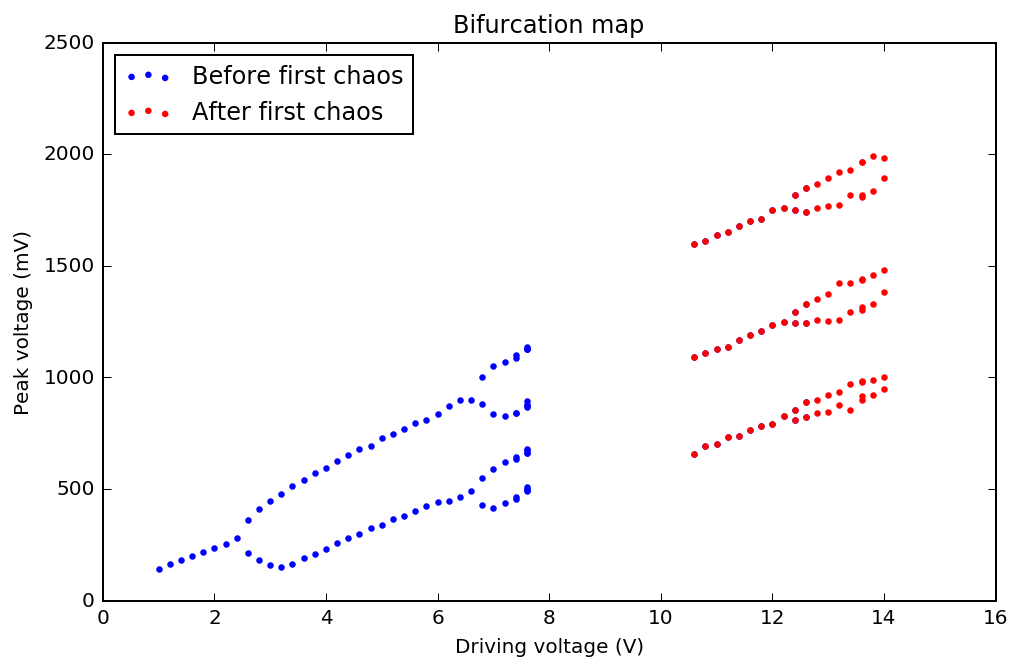

In [136]:
x = plt.scatter(x_drive_1, peak_1, color = "b", marker = ".", label = "Before first chaos")
x = plt.scatter(x_drive_2, peak_2, color = "r", marker = ".", label = "After first chaos")
plt.title("Bifurcation map")
plt.xlabel("Driving voltage (V)")
plt.ylabel("Peak voltage (mV)")
plt.legend(loc = "upper left")
plt.rcParams['figure.figsize'] = [8, 5]

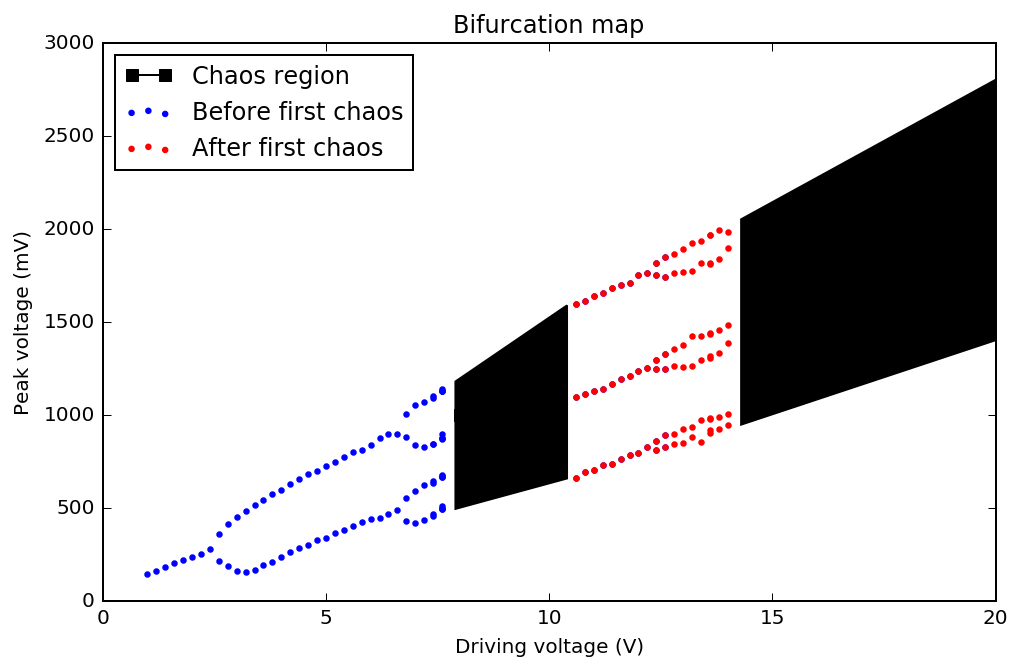

In [205]:
fig, ax = plt.subplots()
fig = plt.scatter(x_drive_1, peak_1, color = "b", marker = ".", label = "Before first chaos")
fig = plt.scatter(x_drive_2, peak_2, color = "r", marker = ".", label = "After first chaos")
fig = plt.plot([8], [1000], color = "k", marker = "s", label = "Chaos region")
plt.title("Bifurcation map")
plt.xlabel("Driving voltage (V)")
plt.ylabel("Peak voltage (mV)")
plt.legend(loc = "upper left")
plt.rcParams['figure.figsize'] = [8, 5]
x = [7.9, 7.9, 10.4, 10.4]
y = [493, 1178, 1587, 656.6 ]
x1 = [14.3, 14.3, 20.0, 20.0]
y1 = [946, 2050, 2800, 1400]
ax.fill(x, y, "k")
ax.fill(x1, y1, "k")
plt.xlim(0, 20)
plt.show()


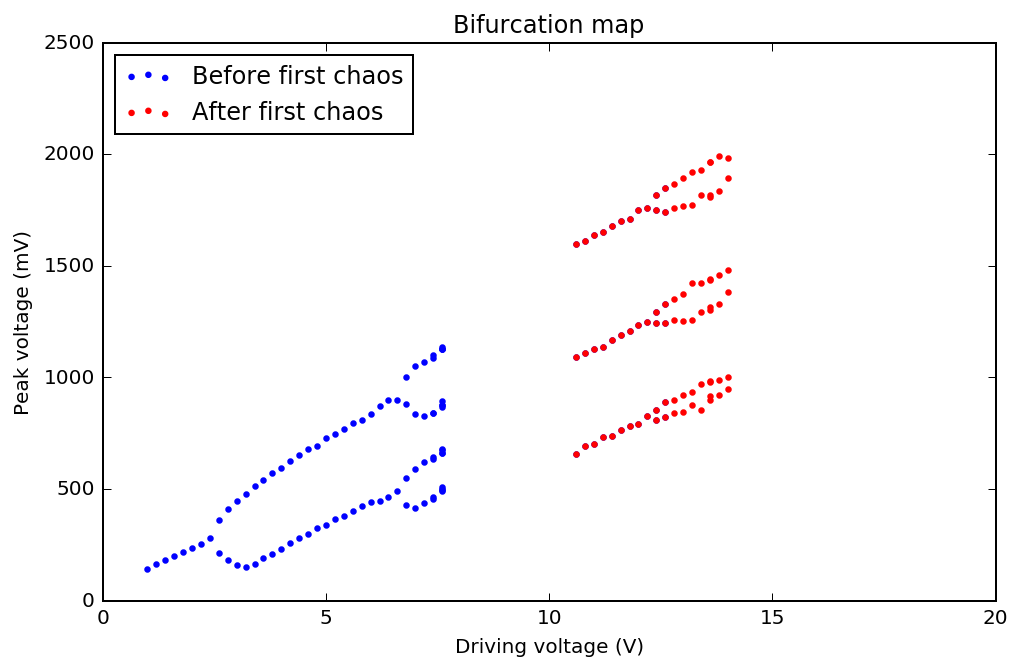

In [183]:
fig = plt.scatter(x_drive_1, peak_1, color = "b", marker = ".", label = "Before first chaos")
fig = plt.scatter(x_drive_2, peak_2, color = "r", marker = ".", label = "After first chaos")
plt.title("Bifurcation map")
plt.xlabel("Driving voltage (V)")
plt.ylabel("Peak voltage (mV)")
plt.legend(loc = "upper left")
plt.rcParams['figure.figsize'] = [8, 5]
plt.xlim(0, 20)
plt.show()
